<a href="https://colab.research.google.com/github/gorzanskik-ai/Binary-classification-of-movie-reviews/blob/main/colab/01_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/movie-reviews/input/IMDB Dataset.csv'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from nltk.util import ngrams
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from collections import Counter
from plotly.subplots import make_subplots
import plotly.graph_objects as go

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Load dataset

In [3]:
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Statistical analysis

In [5]:
good_reviews = df[df['sentiment'] == 'positive']
bad_reviews = df[df['sentiment'] == 'negative']

#lenght of bad and good reviews
print(f'length of good reviews: {len(good_reviews)}')
print(f'length of bad reviews: {len(bad_reviews)}')

length of good reviews: 25000
length of bad reviews: 25000


In [6]:
def plot_histplot(good, bad, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
    sns.histplot(good, ax=ax1, color='Blue')
    ax1.set_title('Good reviews')
    sns.histplot(bad, ax=ax2, color='Red')
    ax2.set_title('Bad reviews')
    fig.suptitle(title)
    plt.show()

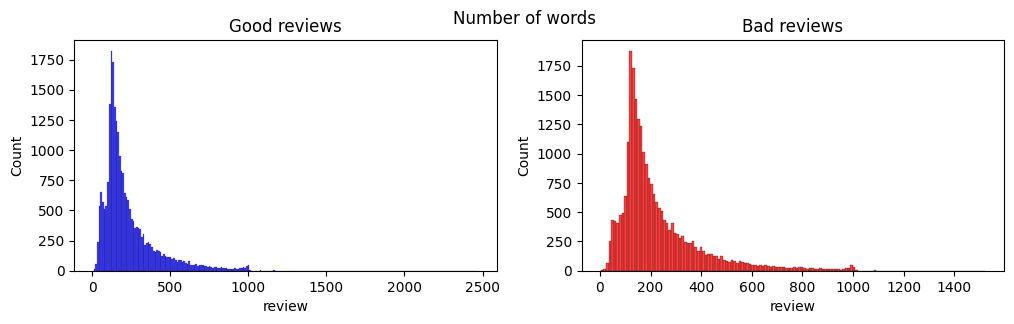

In [7]:
#number of words in gooad and bad reviews
good_reviews_length = good_reviews['review'].str.split().apply(lambda x: len(x))
bad_reviews_length = bad_reviews['review'].str.split().apply(lambda x: len(x))

plot_histplot(good_reviews_length, bad_reviews_length, 'Number of words')

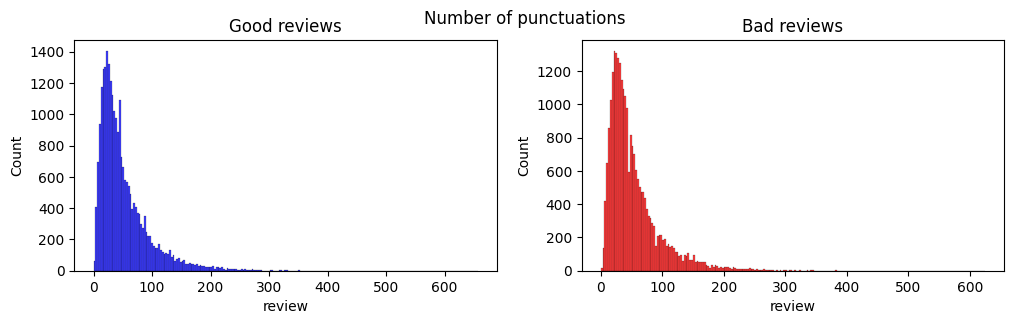

In [8]:
#punctuations
good_reviews_punctuations = good_reviews['review'].apply(lambda x: len([c for c in x if c in string.punctuation]))
bad_reviews_punctuation = bad_reviews['review'].apply(lambda x: len([c for c in x if c in string.punctuation]))

plot_histplot(good_reviews_punctuations, bad_reviews_punctuation, 'Number of punctuations')

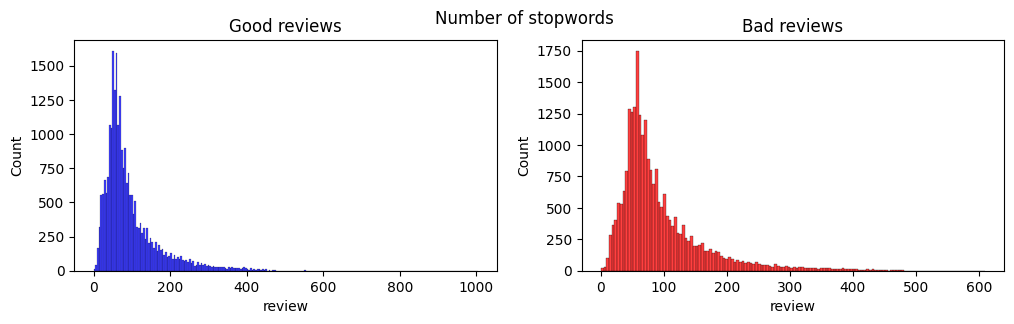

In [9]:
#stopwords
good_reviews_stopwords = good_reviews['review'].str.split().apply(lambda x: len([w for w in x if w in stop_words]))
bad_reviews_stopwords = bad_reviews['review'].str.split().apply(lambda x: len([w for w in x if w in stop_words]))

plot_histplot(good_reviews_stopwords, bad_reviews_stopwords, 'Number of stopwords')

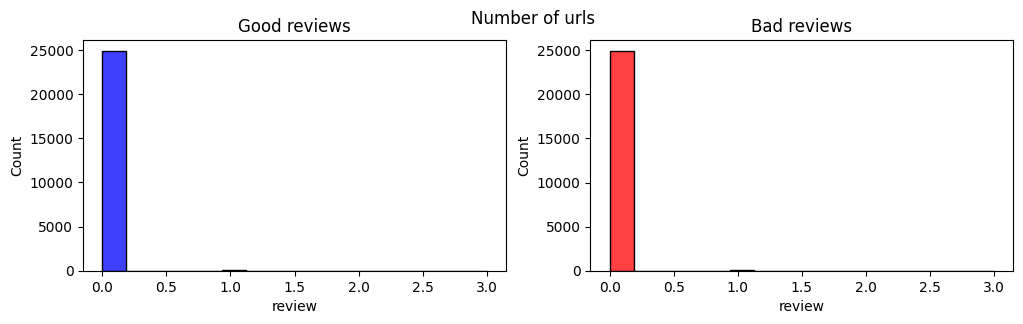

In [10]:
#urls
good_reviews_urls = good_reviews['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
bad_reviews_urls = bad_reviews['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_histplot(good_reviews_urls, bad_reviews_urls, 'Number of urls')

In [11]:
print('good reviews url\n', good_reviews_urls.value_counts())
print('\nbad reviews url\n', bad_reviews_urls.value_counts())

good reviews url
 0    24933
1       64
2        2
3        1
Name: review, dtype: int64

bad reviews url
 0    24945
1       52
2        2
3        1
Name: review, dtype: int64


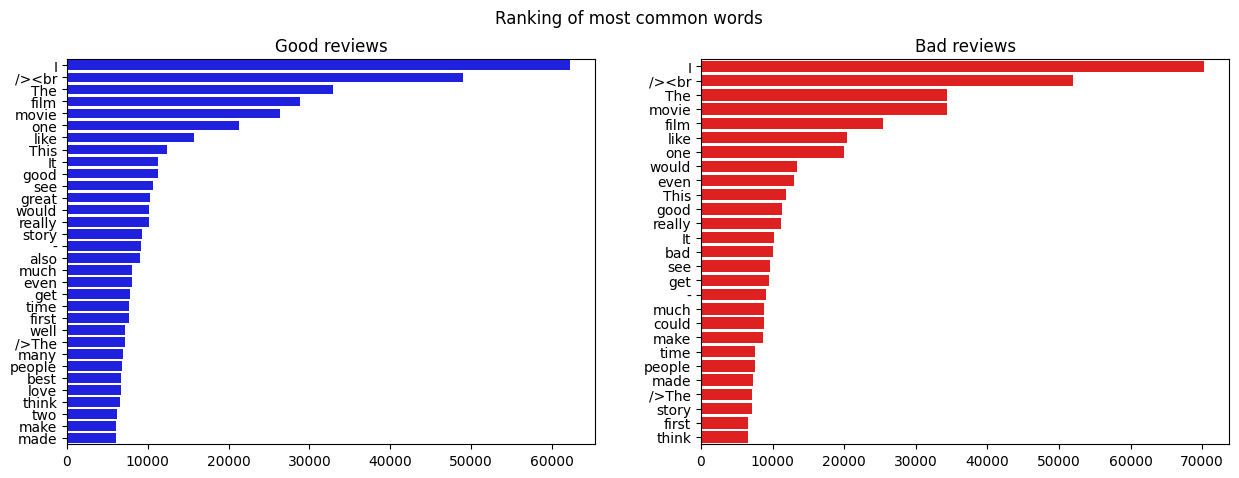

In [12]:
#Most common words in good and bad reviews
def corpus(reviews):
    corpus = []

    for review in reviews['review'].str.split():
        for w in review:
            corpus.append(w)
    return corpus

#all words
good_reviews_corpus = corpus(good_reviews)
bad_reviews_corpus = corpus(bad_reviews)

good_counter=Counter(good_reviews_corpus)
bad_counter=Counter(bad_reviews_corpus)

#most common words in good and bad reviews - ranking(word, count)
good_most=good_counter.most_common()
bad_most=bad_counter.most_common()

#words without stopwords
def ranking(most):
    words = []
    counts = []
    for word, count in most[:100]:  #first 100 words
        if word not in stop_words:  #without stopwords
            words.append(word)
            counts.append(count)
    return words, counts

good_reviews_rank = ranking(good_most)
bad_reviews_rank = ranking(bad_most)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x=good_reviews_rank[1], y=good_reviews_rank[0], ax=ax1, color='Blue')
ax1.set_title('Good reviews')
sns.barplot(x=bad_reviews_rank[1], y=bad_reviews_rank[0], ax=ax2, color='Red')
ax2.set_title('Bad reviews')
fig.suptitle('Ranking of most common words')
plt.show()

N - gram analysis

In [13]:
def n_gram(n, data):
    tokens = []
    for review in data:
        for w in review.lower().split(' '):
            if w != '' and w not in stop_words:
                tokens.append(w)
    output = list(ngrams(tokens, n))
    return output

def ranking_ngram(n_gram):
    counter = Counter(n_gram)
    most_common = counter.most_common()

    words, counts = [], []
    for word, count in most_common[:20]:
        words.append(str(word))
        counts.append(count)

    return words, counts

def plot_ngram(good_x, good_y, bad_x, bad_y, n):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
    sns.barplot(x=good_x, y=good_y, ax=ax1, color='Blue')
    ax1.set_title('Good reviews')
    sns.barplot(x=bad_x, y=bad_y, ax=ax2, color='Red')
    ax2.set_title('Bad reviews')
    fig.suptitle(f'Ranking of most common {n} grams')
    plt.show()

def plot(good_x, good_y, bad_x, bad_y, n, width):
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Bar(x=good_x[::-1], y=good_y[::-1], orientation='h', name='good reviews'), row=1, col=1)
    fig.add_trace(go.Bar(x=bad_x[::-1], y=bad_y[::-1], orientation='h', name='bad reviews'), row=1, col=2)
    fig.update_layout(height=600, width=width, title_text=f'Ranking of most common {n} grams', title_x=0.5)
    fig.show()

In [14]:
#bigram
good_bigram = n_gram(2, good_reviews['review'])
bad_bigram = n_gram(2, bad_reviews['review'])

good_bigram_ranking = ranking_ngram(good_bigram)
bad_bigram_ranking = ranking_ngram(bad_bigram)

plot(good_bigram_ranking[1], good_bigram_ranking[0], bad_bigram_ranking[1], bad_bigram_ranking[0], 2, 1200)

In [15]:
#trigram
good_trigram = n_gram(3, good_reviews['review'])
bad_trigram = n_gram(3, bad_reviews['review'])

good_trigram_ranking = ranking_ngram(good_trigram)
bad_trigram_ranking = ranking_ngram(bad_trigram)

plot(good_trigram_ranking[1], good_trigram_ranking[0], bad_trigram_ranking[1], bad_trigram_ranking[0], 3, 1600)

In [16]:
#pentagram
good_pentagram = n_gram(5, good_reviews['review'])
bad_pentagram = n_gram(5, bad_reviews['review'])

good_pentagram_ranking = ranking_ngram(good_pentagram)
bad_pentagram_ranking = ranking_ngram(bad_pentagram)

plot(good_pentagram_ranking[1], good_pentagram_ranking[0], bad_pentagram_ranking[1], bad_pentagram_ranking[0], 5, 1900)

Data cleaning

In [ ]:
#remove punctuations
def remove_punctuations(data):
    punct_clean = re.compile(r'[^\w\s]')
    data = punct_clean.sub(r'', data)   #sub(pattern, replacement, string)
    return data

#remove HTML syntaxes
def remove_html(data):
    html_clean = re.compile(r'<.*?>')
    data = html_clean.sub(r'', data)
    return data

#removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'', data)
    return data

#removes emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data = emoji_clean.sub(r'', data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data = url_clean.sub(r'', data)
    return data

good_reviews['review'] = good_reviews['review'].apply(lambda x: remove_punctuations(x))
good_reviews['review'] = good_reviews['review'].apply(lambda x: remove_html(x))
good_reviews['review'] = good_reviews['review'].apply(lambda x: remove_url(x))
good_reviews['review'] = good_reviews['review'].apply(lambda x: remove_emoji(x))

bad_reviews['review'] = bad_reviews['review'].apply(lambda x: remove_punctuations(x))
bad_reviews['review'] = bad_reviews['review'].apply(lambda x: remove_html(x))
bad_reviews['review'] = bad_reviews['review'].apply(lambda x: remove_url(x))
bad_reviews['review'] = bad_reviews['review'].apply(lambda x: remove_emoji(x))

In [ ]:
#replacing abbreviated pronouns with full forms (you've -> you have)
def full_pronouns(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)
    return data

good_reviews['review'] = good_reviews['review'].apply(lambda x: full_pronouns(x))
bad_reviews['review'] = bad_reviews['review'].apply(lambda x: full_pronouns(x))

In [19]:
#trigram after data cleaning
good_trigram = n_gram(3, good_reviews['review'])
bad_trigram = n_gram(3, bad_reviews['review'])

good_trigram_ranking = ranking_ngram(good_trigram)
bad_trigram_ranking = ranking_ngram(bad_trigram)

plot(good_trigram_ranking[1], good_trigram_ranking[0], bad_trigram_ranking[1], bad_trigram_ranking[0], 3, 1600)

In [20]:
#clean all data
df['review'] = df['review'].apply(lambda x: remove_punctuations(x))
df['review'] = df['review'].apply(lambda x: remove_html(x))
df['review'] = df['review'].apply(lambda x: remove_url(x))
df['review'] = df['review'].apply(lambda x: remove_emoji(x))
df['review'] = df['review'].apply(lambda x: full_pronouns(x))

Lemmatization

In [21]:
def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in data.split()])
    return text

df['review'] = df['review'].apply(lambda x: lemmatize(x))
df['review'].head()

0    One of the other reviewer ha mentioned that af...
1    A wonderful little production br br The filmin...
2    I thought this wa a wonderful way to spend tim...
3    Basically there a family where a little boy Ja...
4    Petter Matteis Love in the Time of Money is a ...
Name: review, dtype: object

Stemming

In [22]:
def stem(data):
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in data.split()])
    return text

df_copy = df.copy()
df_copy['review'] = df_copy['review'].apply(lambda x: stem(x))
df_copy['review'].head()

0    one of the other review ha mention that after ...
1    a wonder littl product br br the film techniqu...
2    i thought thi wa a wonder way to spend time on...
3    basic there a famili where a littl boy jake th...
4    petter mattei love in the time of money is a v...
Name: review, dtype: object

Save to csv file

In [23]:
df.to_csv('/content/drive/MyDrive/movie-reviews/output/clean_transform.csv', index=False)